In [1]:
import os

In [2]:
#to get the file path in notebooks
# __file__ path no work in Jupiter note
#https://stackoverflow.com/questions/39125532/file-does-not-exist-in-jupyter-notebook
current_dir=os.path.abspath('')

Load dataset

In [3]:
# download the tiny shakespeare dataset
sufix="4maps_alpha"
folder=f"microstate_{sufix}_2sE_dataset_pretokenize"
input_file_path = os.path.join(os.path.dirname(current_dir), f"data/{folder}/output_{sufix}_2sE.train.txt")
print(input_file_path)

/home/rjarpa/code/nanoGPT/data/microstate_4maps_alpha_2sE_dataset_pretokenize/output_4maps_alpha_2sE.train.txt


In [4]:
# Read the text file and store each line as an element in a list
def read_text_file_to_list(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        lines = [line.strip() for line in lines]
    return lines


In [5]:
# Replace 'file_path.txt' with the actual path to your text file
dataset = read_text_file_to_list(input_file_path)

# Print the list
#print(dataset)

**Load tokenizer**

In [6]:
token_file_path = f"{os.path.dirname(current_dir)}/data/tokenizer-output-{sufix}-2sE.json"

In [7]:
#https://huggingface.co/docs/transformers/fast_tokenizers

from transformers import PreTrainedTokenizerFast
tokenizer = PreTrainedTokenizerFast(tokenizer_file=token_file_path)


/opt/anaconda3/envs/gpt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:


# Tokenize the dataset and count the occurrences
vocab_count = {}
for sentence in dataset:
    encoding = tokenizer.encode(sentence)
    #tokens = encoding.tokens
    for token in encoding:
        vocab_count[token] = vocab_count.get(token, 0) + 1


In [9]:
# Tokenize the dataset and count the occurrences
vocab_count_decoded = {}
for sentence in dataset:
    encoding = tokenizer.encode(sentence)
    #tokens = encoding.tokens
    for token in encoding:
        vocab_count_decoded[tokenizer.decode(token)] = vocab_count_decoded.get(tokenizer.decode(token), 0) + 1


In [10]:
# Optionally, you can sort the vocabulary by count
sorted_vocab_count = {k: v for k, v in sorted(vocab_count.items(), key=lambda item: item[1], reverse=True)}


In [11]:
# Optionally, you can sort the vocabulary by count
sorted_vocab_count_decoded = {k: v for k, v in sorted(vocab_count_decoded.items(), key=lambda item: item[1], reverse=True)}


In [12]:
# Print the result
for token, count in sorted_vocab_count_decoded.items():
    print(f"{token}: {count}")

BBBDDD: 249
BBBBCCC: 237
BBBCCCC: 232
BBBBCCCC: 230
BBBCCC: 228
AAACCC: 226
BBBBCCCCC: 218
AAAADDD: 218
AAACCCC: 218
BBBDDDD: 214
AAAADDDD: 212
DDDDDDDDDD: 211
BBBBDDDD: 210
AAADDDD: 206
BBBBBBBBBBB: 204
BBBBBCCCC: 202
AAADDD: 202
CCCCCCCCC: 202
DDDDDDDDD: 202
DDDDDDDDDDDD: 201
AAAACCCC: 199
CCCCCCCCCC: 196
AAAAAAAAAA: 195
CCCCCCCCCCC: 194
AAAACCC: 194
AAAADDDDD: 190
AAAAACCCC: 189
BBBBBBBBBBBBBB: 189
BBBBBBBBBBBB: 188
AAAACCCCC: 188
DDDDDDDDDDD: 185
BBBBDDDDD: 184
AAAAACCCCC: 184
AAAAAAAAAAA: 182
BBBDD: 182
B: 182
BBBBBCCCCC: 181
A: 180
AAACC: 179
BBBBDDD: 179
BBBBBBBBBB: 178
BBBBBDDDD: 178
AAAAADDDD: 178
AAADDDDD: 178
AAAAAAAAAAAA: 177
AAAADDDDDD: 175
BBBBBBBBBBBBBBB: 175
AADDD: 175
BBBBAAA: 175
BBBBBDDD: 174
BBDDD: 174
BBBBBCCC: 173
BBCCC: 171
BBBDDDDD: 169
BBBCCCCC: 168
BBBBBBDDD: 168
BBBBBBDDDD: 167
BBBCC: 166
CCCCCCCCCCCCC: 166
BBBBBDDDDD: 165
AAAAAAAAA: 165
AAADD: 165
DDDDDDDDDDDDDD: 165
AAAAAACCCCC: 165
AAAAADDDDD: 164
BBBBBBBBB: 163
AAACCCCC: 163
CCCCCCCCCCCCCC: 163
AAAAAAAAAA

In [13]:
# Print the result
for token, count in sorted_vocab_count.items():
    print(f"{token}: {count}")
    

61: 249
78: 237
82: 232
75: 230
59: 228
63: 226
108: 218
86: 218
88: 218
84: 214
80: 212
50: 211
77: 210
85: 206
48: 204
104: 202
64: 202
47: 202
44: 202
60: 201
79: 199
51: 196
46: 195
55: 194
81: 194
118: 190
114: 189
67: 189
52: 188
115: 188
53: 185
106: 184
138: 184
49: 182
102: 182
7: 182
129: 181
6: 180
110: 179
87: 179
45: 178
119: 178
134: 178
145: 178
54: 177
147: 175
70: 175
132: 175
97: 175
133: 174
130: 174
121: 173
117: 171
128: 169
120: 168
173: 168
154: 167
98: 166
69: 166
123: 165
43: 165
112: 165
76: 165
176: 165
146: 164
42: 163
142: 163
83: 163
65: 162
153: 162
56: 161
141: 161
157: 161
62: 160
57: 158
22: 158
140: 157
183: 157
159: 157
89: 157
165: 157
160: 155
105: 155
164: 154
100: 153
23: 152
111: 152
152: 151
136: 151
167: 151
72: 150
148: 150
73: 149
188: 149
58: 148
93: 148
126: 146
201: 146
113: 146
163: 145
107: 144
96: 143
90: 143
66: 143
14: 142
101: 142
15: 142
158: 142
91: 142
124: 140
156: 140
169: 140
197: 140
149: 139
187: 139
174: 139
177: 139
95: 13

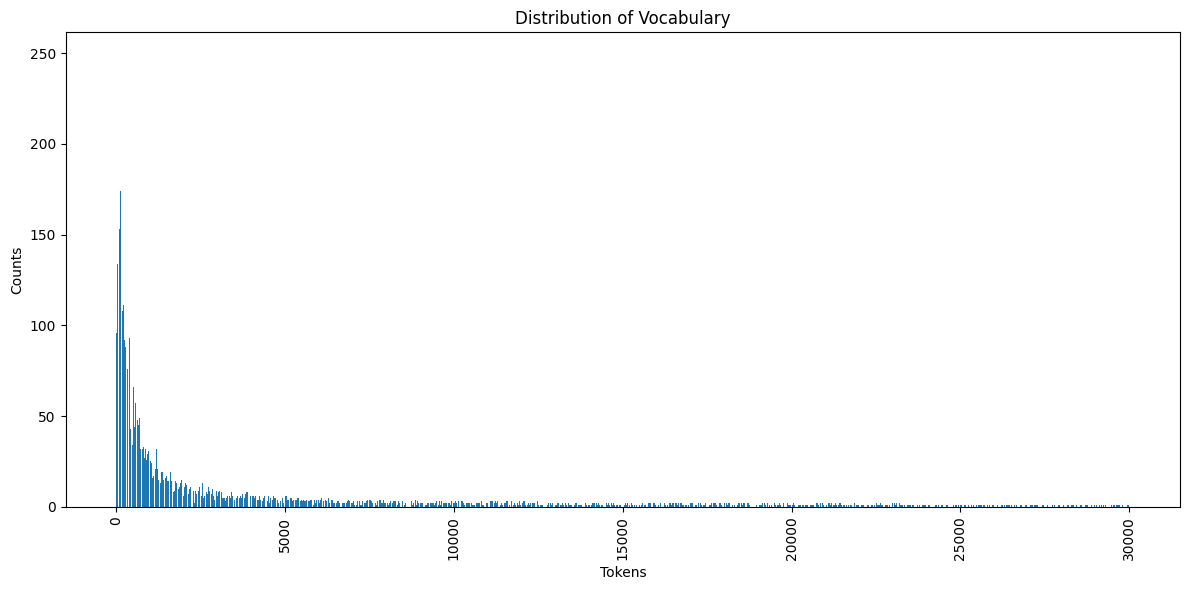

In [14]:
import matplotlib.pyplot as plt

# Your code to calculate sorted_vocab_count goes here...

# Convert the sorted_vocab_count dictionary into two lists: tokens and counts
tokens, counts = zip(*sorted_vocab_count.items())

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(tokens, counts)
plt.xlabel("Tokens")
plt.ylabel("Counts")
plt.title("Distribution of Vocabulary")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
# Filter vocab_count to include items with at least 100 occurrences
min_occurrences = 100
filtered_vocab_count = {token: count for token, count in sorted_vocab_count_decoded.items() if count >= min_occurrences}


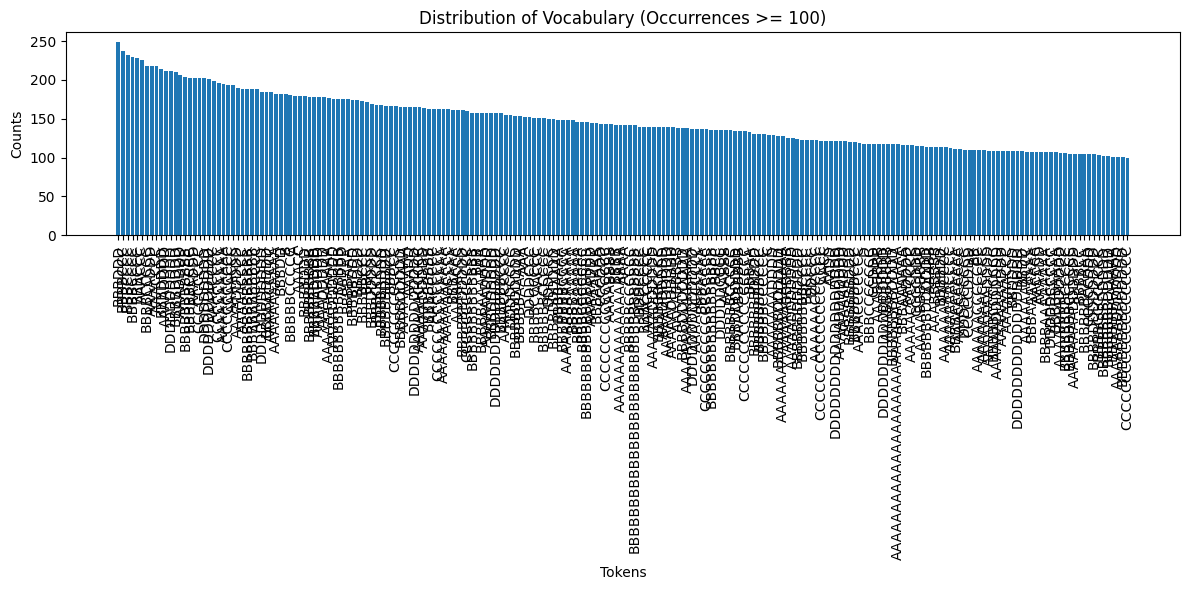

In [16]:
# Convert the filtered_vocab_count dictionary into two lists: tokens and counts
tokens, counts = zip(*filtered_vocab_count.items())

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(tokens, counts)
plt.xlabel("Tokens")
plt.ylabel("Counts")
plt.title(f"Distribution of Vocabulary (Occurrences >= {min_occurrences})")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [17]:
print(f"filtered_vocab_count: {len(filtered_vocab_count)}")
print(f"vocab_count_decoded: {len(vocab_count_decoded)}")

aprox_words=round(len(filtered_vocab_count)*100/95)
print(f"recommended size vocab: {aprox_words}")

filtered_vocab_count: 212
vocab_count_decoded: 24170
recommended size vocab: 223


In [18]:
#whole dataset
#filtered_vocab_count: 1920
#vocab_count_decoded: 28952
#recommended size vocab: xxxx

